In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Augmented Reality (AR)

Augments the real world around us with computer-generated perceptual information.

### April Tags

AprilTags are a type of fiducial marker. Fiducials are special markers we place in the view of the camera such that they are easily identifiable.

In [ ]:
!pip install opencv-contrib-python opencv_camera moms_apriltag

**Generate April Tags**

In [5]:
from moms_apriltag import TagGenerator2, TagGenerator3

| Family          | Generation | Hamming | Size    | Data Bits | Unique Tags |
|-----------------|------------|---------|---------|-----------|-------------|
| tag16h5         | 2          | 5       | 4x4     | 16        | 30          |
| tag25h9         | 2          | 9       | 5x5     | 25        | 35          |
| tag36h10        | 2          | 10      | 5x5     | 36        | 2,320       |
| tag36h11        | 2          | 11      | 5x5     | 36        | 587         |
| tagCircle21h7   | 3          | 7       | 9x9     | 36        | 38          |
| tagCircle49h12  | 3          | 12      | 11x11   | 49        | 65,535      |
| tagCustom48h12  | 3          | 12      | 10x10   | 48        | 42,211      |
| tagStandard41h12| 3          | 12      | 9x9     | 41        | 2,115       |
| tagStandard52h13| 3          | 13      | 10x10   | 52        | 48,714      |

In [30]:
tag_v2_family = ["tag16h5", "tag25h9", "tag36h10", "tag36h11"]

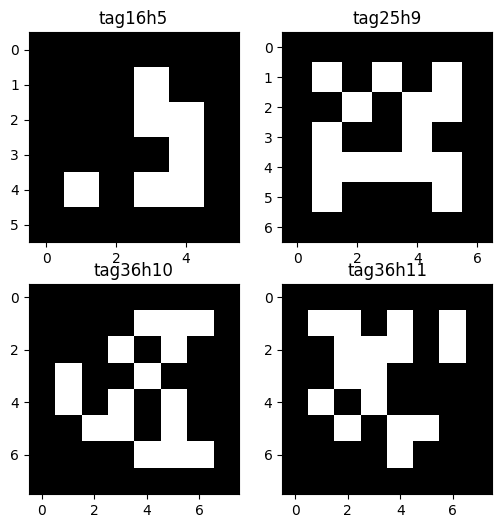

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for idx, tag_family in enumerate(tag_v2_family):
    row, col = idx // 2, idx % 2

    tag_v2 = TagGenerator2(tag_family)
    img_tag_v2 = tag_v2.generate(0)

    axes[row, col].imshow(img_tag_v2, cmap="gray")
    axes[row, col].set_title(tag_family)

plt.show()

In [27]:
tag_v3_family = ["tagCircle21h7", "tagCircle49h12", "tagCustom48h12", "tagStandard41h12", "tagStandard52h13"]

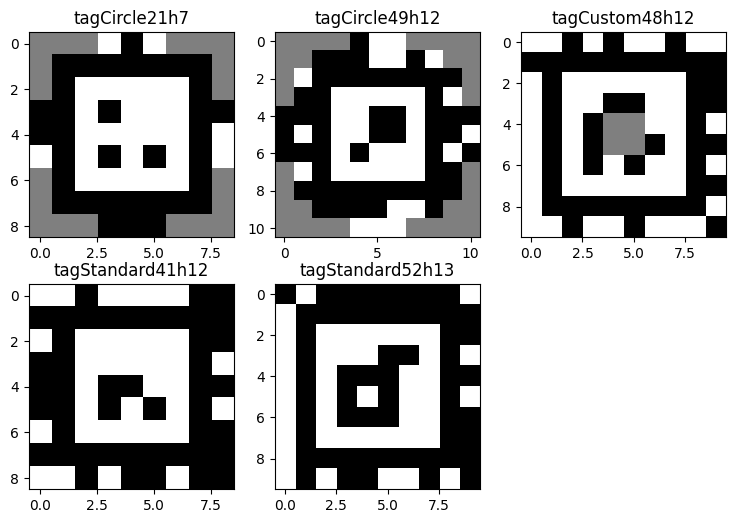

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.delaxes(axes[1][2])


for idx, tag_family in enumerate(tag_v3_family):
    row, col = idx // 3, idx % 3

    tag_v3 = TagGenerator3(tag_family)
    img_tag_v3 = tag_v3.generate(0)

    axes[row, col].imshow(img_tag_v3, cmap="gray")
    axes[row, col].set_title(tag_family)

plt.show()

In [36]:
from opencv_camera import mosaic

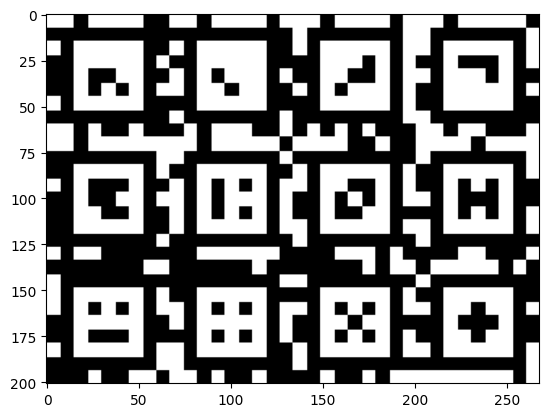

In [41]:
tags = []
tag_v3 = TagGenerator3("tagStandard41h12")

for tag_id in [0,1,2,3,4,5,100,113,137,141,146,283]:
    img_tag_v3 = tag_v3.generate(tag_id, scale=30)
    tags.append(img_tag_v3)
    
plt.imshow(mosaic(tags), cmap="gray")
plt.show()

### ArUCo Markers

ArUco markers are 2D binary patterns that computer vision algorithms can easily detect.

In [309]:
predefined_dict = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [340]:
def generate_aruco(marker_id, marker_size=300, marker_dict=cv2.aruco.DICT_ARUCO_ORIGINAL):
    return cv2.aruco.generateImageMarker(cv2.aruco.getPredefinedDictionary(marker_dict), marker_id, marker_size)

In [347]:
img_aruco = generate_aruco(21)

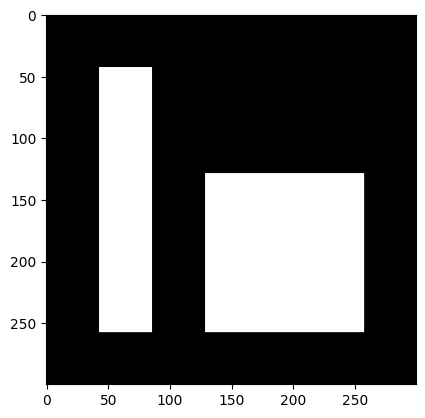

In [348]:
plt.imshow(img_aruco, cmap="gray")
plt.show()

In [349]:
def auto_detect_marker(img):
    marker_dict, max_count = cv2.aruco.DICT_ARUCO_ORIGINAL, 0

    for marker_name in predefined_dict.values():
        detector = cv2.aruco.ArucoDetector(
            cv2.aruco.getPredefinedDictionary(marker_name), 
            cv2.aruco.DetectorParameters()
        )
        
        marker_corners, _, _ = detector.detectMarkers(img)

        if max_count < len(marker_corners):
            marker_dict, max_count = marker_name, len(marker_corners)

    return marker_dict

In [353]:
def detect_aruco(img):
    marker_dict = auto_detect_marker(img)
    detector = cv2.aruco.ArucoDetector(
        cv2.aruco.getPredefinedDictionary(marker_dict), 
        cv2.aruco.DetectorParameters()
    )

    marker_corners, marker_ids, rejected_candidates = detector.detectMarkers(img)
    
    if marker_corners:
        marker_ids = marker_ids.flatten()

        cv2.aruco.drawDetectedMarkers(img, marker_corners) 

        for marker_corner, marker_id in zip(marker_corners, marker_ids):
            marker_corner = marker_corner.reshape((4, 2)).astype(int)
            
            (bottom_right, top_right, top_left, bottom_left) = marker_corner

            c_x = int((top_left[0] + bottom_right[0]) / 2.0)
            c_y = int((top_left[1] + bottom_right[1]) / 2.0)
            
            cv2.circle(img, (c_x, c_y), 2, (255, 0, 0), -1)
            cv2.putText(img, str(marker_id), (top_left[0], top_left[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
        plt.imshow(img)
        plt.show()

In [354]:
img = cv2.imread("./images/pantone.jpg", cv2.IMREAD_UNCHANGED)

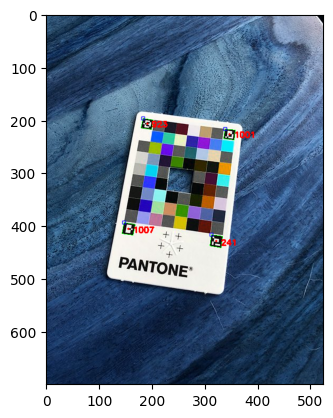

In [355]:
detect_aruco(img)

### ArUCo Pose Estimation

https://github.com/GSNCodes/ArUCo-Markers-Pose-Estimation-Generation-Python/

Camera calibration

In [ ]:
def calibrate(dirpath, square_size, width, height, visualize=False):
    """ Apply camera calibration operation for images in the given directory path. """

    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,6,0)
    objp = np.zeros((height*width, 3), np.float32)
    objp[:, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

    objp = objp * square_size

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d point in real world space
    imgpoints = []  # 2d points in image plane.

    images = os.listdir(dirpath)

    for fname in images:
        img = cv2.imread(os.path.join(dirpath, fname))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (width, height), None)

        # If found, add object points, image points (after refining them)
        if ret:
            objpoints.append(objp)

            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (width, height), corners2, ret)

        if visualize:
            cv2.imshow('img',img)
            cv2.waitKey(0)


    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return [ret, mtx, dist, rvecs, tvecs]

In [ ]:
def pose_esitmation(frame, aruco_dict_type, matrix_coefficients, distortion_coefficients):

    '''
    frame - Frame from the video stream
    matrix_coefficients - Intrinsic matrix of the calibrated camera
    distortion_coefficients - Distortion coefficients associated with your camera

    return:-
    frame - The frame with the axis drawn on it
    '''

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.aruco_dict = cv2.aruco.Dictionary_get(aruco_dict_type)
    parameters = cv2.aruco.DetectorParameters_create()


    corners, ids, rejected_img_points = cv2.aruco.detectMarkers(gray, cv2.aruco_dict,parameters=parameters,
        cameraMatrix=matrix_coefficients,
        distCoeff=distortion_coefficients)

        # If markers are detected
    if len(corners) > 0:
        for i in range(0, len(ids)):
            # Estimate pose of each marker and return the values rvec and tvec---(different from those of camera coefficients)
            rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], 0.02, matrix_coefficients,
                                                                       distortion_coefficients)
            # Draw a square around the markers
            cv2.aruco.drawDetectedMarkers(frame, corners) 

            # Draw Axis
            cv2.aruco.drawAxis(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 0.01)  

    return frame

### References

- https://pyimagesearch.com/2020/11/02/apriltag-with-python/
- https://pyimagesearch.com/2020/12/14/generating-aruco-markers-with-opencv-and-python/
- https://pyimagesearch.com/2021/01/04/opencv-augmented-reality-ar/